# Exemple avec SimFin

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload 
import sys 
#sys.path.append('/users/loulou/cedia/simfin/Model')
import warnings
import simfin

warnings.filterwarnings('ignore')

In [2]:
simfin = reload(simfin)

In [3]:
x = simfin.simulator(2019,2021)

alignment factor for health :  1.2485447430148122
alignment factor for education :  1.4417133670200024


In [4]:
x.simulate()

In [5]:
x.summary

,2019,2020
personal,31773,32189.4
corporate,9183,9303.34
consumption,21001,21276.2
other taxes,29669,30057.8
autonomous,73505,92826.7
federal transfers,23120,23423
total revenue,96625,116250
mission health,41522,43368.5
mission education,23887,23165.1
other missions,32335,33438.3


In [6]:
#compare = x.summary
x.reset()
x.simulate()
x.summary

,2019,2020
personal,31773,32189.4
corporate,9183,9303.34
consumption,21001,21276.2
other taxes,29669,30057.8
autonomous,73505,92826.7
federal transfers,23120,23423
total revenue,96625,116250
mission health,41522,43368.5
mission education,23887,23165.1
other missions,32335,33438.3


In [7]:
x = simfin.simulator(2019,2021)

alignment factor for health :  1.2485447430148122
alignment factor for education :  1.4417133670200024


In [10]:
@x.replication(10)
def my_simulation():
    x.simulate()

In [11]:
my_simulation()

In [14]:
x.all_summary[0].equals(x.all_summary[9])

True

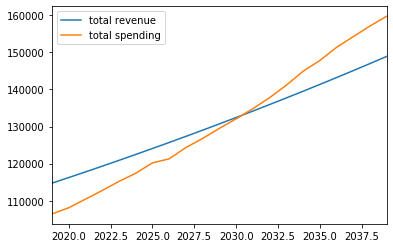

In [17]:

x.summary.loc[['total revenue','total spending'],:].T.plot()

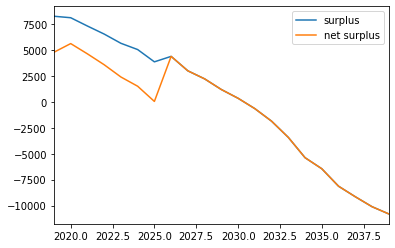

In [18]:
x.summary.loc[['surplus','net surplus'],:].T.plot()

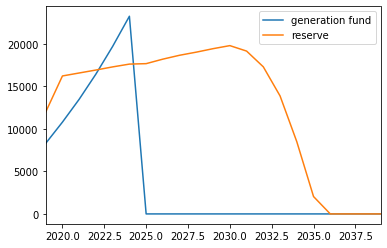

In [19]:
x.summary.loc[['generation fund','reserve'],:].T.plot()

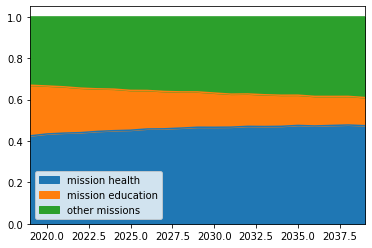

In [20]:
missions = x.summary.loc[['mission health','mission education','other missions'],:].T
tot = missions.sum(axis=1)
for c in missions.columns:
    missions[c] = missions[c]/tot
missions.plot.area()

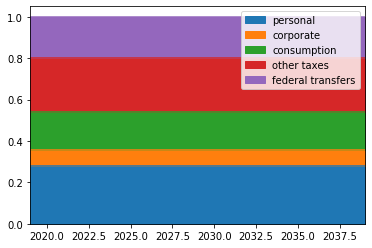

In [21]:
revenue = x.summary.loc[['personal','corporate','consumption','other taxes','federal transfers'],:].T
tot = revenue.sum(axis=1)
for c in revenue.columns:
    revenue[c] = revenue[c]/tot
revenue.plot.area()


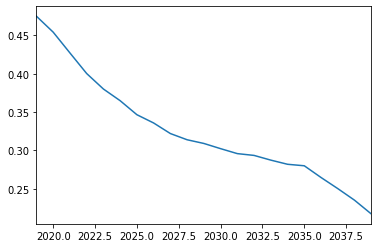

In [22]:
x.summary.loc['debt-to-gdp',:].plot()